<a href="https://colab.research.google.com/github/kmsekgothe/load-shortfall-regression-predict-api/blob/master/KaggleNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 14 - Regression Predict

© Explore Data Science Academy

---

### Introduction: Spain Electricity Shortfall Challenge

The continuous supply of elecricity is an essential part of modern life, it powers households so that they may keep warm, cook food, stay connected, and it powers various industries among other things. It is therefore important in modern societies to have an uniterrupted supply of electricity by investing in electricity infrastructure. However, there has been a global shift from non-renewable to renewable energy sources due to sustainability reasons.

In Spain, the government is considering an expansion of its renewable energy resource infrastructure investments and they require information on the trends and patterns of the country's renewable sources and fossil fuel energy generation. Because of this, the government of Spain has been tracking the different energy sources available within the country.

---

### Predict Overview

We’ve have been tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable resources. 


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

In this section we import the necessary libraries needed for Data Analysis, Data Manipulation, Data Visualization and Model Building.

In [1]:
#libraries needed for Data Analysis and  Data Manipulation
import numpy as np #used to evaluate arrays
import pandas as pd #used to create and utilise tabular data ie Pandas DataFrame

#libraries to be used for Data Visualization
import matplotlib.pyplot as plt #used to visualize data
import seaborn as sns #used to visualize data
from matplotlib import rc

# Libraries for data preparation and model building
import sklearn
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score
from xgboost.sklearn import XGBRegressor

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- Loading of Test and Train datasets. 
- Concatenate the datasets to ensure Data Engineering is done only once (for convenience). 
- Dataframes will then be split later on when needed.

In [2]:
df_train = pd.read_csv('df_train.csv', index_col=0) # load the data
df_test = pd.read_csv('df_test.csv', index_col=0)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.concat([df_train, df_test])

Perform basic analysis on the dataframe.

In [4]:
#Basic Analysis

df.shape #train DataFrame has 8763 rows and 48 columns

(11683, 48)

In [5]:
df.head(3)

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
0  2015-01-01 03:00:00           0.666667           level_5             0.0   
1  2015-01-01 06:00:00           0.333333          level_10             0.0   
2  2015-01-01 09:00:00           1.000000           level_9             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                1.0                 0.0       223.333333   
1                1.0                 0.0       221.000000   
2                1.0                 0.0       214.333333   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333              800.0    274.945000          71.000000   
2     278.008667              800.0    278.792000          65.666667   

   Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  \
0         269.888000          281.013000       265.938000      281.013000   
1         271.728333          280.561667       266.386667      280.561667   
2         278.008667          281.583667       272.708667      281.583667   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667   265.938000       265.938000        6715.666667  
1        274.945000   266.386667       266.386667        4171.666667  
2        278.792000   272.708667       272.708667        4274.666667

In [6]:
df_test.head(3)

time  Madrid_wind_speed Valencia_wind_deg  \
8763  2018-01-01 00:00:00           5.000000           level_8   
8764  2018-01-01 03:00:00           4.666667           level_8   
8765  2018-01-01 06:00:00           2.333333           level_7   

      Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
8763             0.0             5.000000              87.0        71.333333   
8764             0.0             5.333333              89.0        78.000000   
8765             0.0             5.000000              89.0        89.666667   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
8763               20.0           3.000000            0.000000   
8764                0.0           3.666667            0.000000   
8765                0.0           2.333333            6.666667   

      Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  \
8763       193.333333              4.000000          176.666667   
8764       143.333333              4.666667          266.666667   
8765       130.000000              4.000000          263.333333   

      Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  \
8763                0.0            1.000000                0.0   
8764                0.0            0.666667                0.0   
8765                0.0            0.666667                0.0   

     Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  \
8763             sp25              0.0               0         1017.333333   
8764             sp25              0.0               0         1020.333333   
8765             sp25              0.0               0         1023.000000   

      Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  \
8763              0.0             0.0                0.0                 0   
8764              0.0             0.0                0.0                 0   
8765              0.0             0.0                0.0                 0   

      Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
8763              800.0            800.000000      1025.666667   
8764              800.0            800.333333      1026.666667   
8765              800.0            800.000000      1025.333333   

      Seville_weather_id  Valencia_pressure  Seville_temp_max  \
8763          800.000000                NaN        284.483333   
8764          800.000000                NaN        282.483333   
8765          800.333333                NaN        280.816667   

      Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  \
8763      1030.000000         287.483333     287.483333              801.0   
8764      1030.333333         284.150000     284.150000              721.0   
8765      1030.666667         282.816667     282.816667              800.0   

      Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  \
8763    283.673333          46.333333         287.483333          287.816667   
8764    281.673333          53.666667         284.150000          284.816667   
8765    280.613333          42.000000         282.816667          284.483333   

      Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
8763       280.816667      287.356667       276.150000   280.380000   
8764       280.483333      284.190000       277.816667   281.010000   
8765       276.483333      283.150000       276.816667   279.196667   

      Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
8763          286.816667           285.15        283.150000   279.866667   
8764          283.483333           284.15        281.150000   279.193333   
8765          281.816667           282.15        280.483333   276.340000   

      Madrid_temp_min  
8763           279.15  
8764           278.15  
8765           276.15

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 11682
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  11683 non-null  object 
 1   Madrid_wind_speed     11683 non-null  float64
 2   Valencia_wind_deg     11683 non-null  object 
 3   Bilbao_rain_1h        11683 non-null  float64
 4   Valencia_wind_speed   11683 non-null  float64
 5   Seville_humidity      11683 non-null  float64
 6   Madrid_humidity       11683 non-null  float64
 7   Bilbao_clouds_all     11683 non-null  float64
 8   Bilbao_wind_speed     11683 non-null  float64
 9   Seville_clouds_all    11683 non-null  float64
 10  Bilbao_wind_deg       11683 non-null  float64
 11  Barcelona_wind_speed  11683 non-null  float64
 12  Barcelona_wind_deg    11683 non-null  float64
 13  Madrid_clouds_all     11683 non-null  float64
 14  Seville_wind_speed    11683 non-null  float64
 15  Barcelona_rain_1h  

- The load_shortfall_3h column is the dependant/target variable.   
- We can see that **Valencia_wind_deg**, **Seville_pressure** and **time** are objects datatypes and need to be changed to numeric datatypes to be able to use those features in the Data Modeling process.

# Data Preprocessing

Data Cleaning and Formatting
 

Before we can do **Exploratory Data Analysis** (EDA) in section 3, we need to ensure that our data is in the correct numeric format that can actually be used.

In [8]:
# These are the objects we noted during basic data analysis.
print(df['Seville_pressure'].unique())
print(df['Valencia_wind_deg'].unique())

['sp25' 'sp23' 'sp24' 'sp21' 'sp16' 'sp9' 'sp15' 'sp19' 'sp22' 'sp11'
 'sp8' 'sp4' 'sp6' 'sp13' 'sp17' 'sp20' 'sp18' 'sp14' 'sp12' 'sp5' 'sp10'
 'sp7' 'sp3' 'sp2' 'sp1']
['level_5' 'level_10' 'level_9' 'level_8' 'level_7' 'level_6' 'level_4'
 'level_3' 'level_1' 'level_2']


We can see that the values above display a clear hierarchy of variables, no need to impute new values, we can easily extract the integer values.

In [9]:
# Extract the number from Seville_pressure (turn object into numeric values)
df['Seville_pressure'] = df['Seville_pressure'].str[2:]
df['Seville_pressure'] = round(df['Seville_pressure'].astype(float), 6)

# Extract the number from Valencia_wind_deg (turn object into numeric values)
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str[6:]
df['Valencia_wind_deg'] = round(df['Valencia_wind_deg'].astype(float), 6)

In [10]:
# Lets take a look at the changes made above.

print(df['Seville_pressure'].unique())
print(df['Valencia_wind_deg'].unique()) 

[25. 23. 24. 21. 16.  9. 15. 19. 22. 11.  8.  4.  6. 13. 17. 20. 18. 14.
 12.  5. 10.  7.  3.  2.  1.]
[ 5. 10.  9.  8.  7.  6.  4.  3.  1.  2.]


We can clearly see **Seville_pressure** and **Valencia_wind_deg** are now in the correct datatype to be used.

In [11]:
# Here we change the time datatype from object to datetime

df['time']=pd.to_datetime(df['time'])

Pandas DateTime type can't be used in Data Modeling. We will extract the Day / Month / Year and Hour.

In [12]:
df['Day'] = df['time'].dt.day # Extract the Day
df['Month'] = df['time'].dt.month # Extract the Month
df['Year'] = df['time'].dt.year # Extract the Year
df["Hour"]=df['time'].dt.hour # Extract the Hour
df.drop('time',axis=1,inplace=True) # Dropping of the original time feature - As necessary data has been extracted.

In [13]:
df.head(5) # Take a look at changes.

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                5.0             0.0             0.666667   
1           0.333333               10.0             0.0             1.666667   
2           1.000000                9.0             0.0             1.000000   
3           1.000000                8.0             0.0             1.000000   
4           1.000000                7.0             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0                 0.0       223.333333              6.333333   
1                 0.0       221.000000              4.000000   
2                 0.0       214.333333              2.000000   
3                 0.0       199.666667              2.333333   
4                 0.0       185.000000              4.333333   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           42.666667                0.0            3.333333   
1          139.000000                0.0            3.333333   
2          326.000000                0.0            2.666667   
3          273.000000                0.0            4.000000   
4          260.000000                0.0            3.000000   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  \
0                0.0              25.0              0.0             0.0   
1                0.0              25.0              0.0             0.0   
2                0.0              25.0              0.0             0.0   
3                0.0              25.0              0.0             0.0   
4                0.0              25.0              0.0             0.0   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0         1036.333333              0.0             0.0                0.0   
1         1037.333333              0.0             0.0                0.0   
2         1038.000000              0.0             0.0                0.0   
3         1037.000000              0.0             0.0                0.0   
4         1035.000000              0.0             0.0                0.0   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0               0.0              800.0                 800.0      1035.000000   
1               0.0              800.0                 800.0      1035.666667   
2               0.0              800.0                 800.0      1036.000000   
3               0.0              800.0                 800.0      1036.000000   
4               0.0              800.0                 800.0      1035.333333   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  \
0               800.0        1002.666667        274.254667       971.333333   
1               800.0        1004.333333        274.945000       972.666667   
2               800.0        1005.333333        278.792000       974.000000   
3               800.0        1009.000000        285.394000       994.666667   
4               800.0                NaN        285.513719      1035.333333   

   Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  \
0         269.888000     269.888000              800.0    274.254667   
1         271.728333     271.728333              800.0    274.945000   
2         278.008667     278.008667              800.0    278.792000   
3         284.899552     284.899552              800.0    285.394000   
4         283.015115     283.015115            

**Day**, **Month**, **Year** and **Hour** have been correctly extracted.

In [14]:
df.dtypes

Madrid_wind_speed       float64
Valencia_wind_deg       float64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure        float64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia

All our data is in the correct format to be used for EDA, Data Engineering and Modeling.

In [15]:
# We can look at the null values currently present in our data
df.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

We see that **Valencia_pressure** and **load_shortfall_3h** have null values.
We know **load_shortfall_3h** will have null values as those are the values we will be predicting (these null values fall within the test dataset) so only **Valencia_pressure** must be fixed. 
Options: 
1. Removal of entire feature 
2. Data imputation

This imputation will happen within the EDA section because we need to get a better understanding of the feature data distribution in order to determine whether to use the data median or mean for the imputation.

In [16]:
# We are sorting the data for easier and better data exploration.
df = df.sort_index(axis=1)

In [17]:
df.shape

(11683, 51)

#### Data Cleaning and Formatting Summary

- Changed the object datatypes into numeric datatypes. 

- Created four new columns (i.e year, month, day, hour) from the time column then dropped the time column 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to check assumptions with the help of summary statistics and graphical representations.
The following section analyses and provides an overview of the given data

### Non Graphical univariate analysis

These are the descriptive statistics of each feature. 

In [18]:
# Lets look at the data statistics
df.describe()

Barcelona_pressure  Barcelona_rain_1h  Barcelona_rain_3h  \
count        1.168300e+04       11683.000000       11683.000000   
mean         1.287326e+03           0.108534           0.000331   
std          1.218906e+04           0.556794           0.003466   
min          6.706667e+02           0.000000           0.000000   
25%          1.013667e+03           0.000000           0.000000   
50%          1.017333e+03           0.000000           0.000000   
75%          1.021167e+03           0.000000           0.000000   
max          1.001411e+06          12.000000           0.093000   

       Barcelona_temp  Barcelona_temp_max  Barcelona_temp_min  \
count    11683.000000        11683.000000        11683.000000   
mean       289.869413          291.042128          288.616766   
std          6.680538            7.236360            6.391989   
min        270.816667          272.150000          269.483333   
25%        284.816667          285.338609          284.150000   
50%        289.426667          290.150000          288.276333   
75%        295.150000          296.816667          293.483333   
max        308.150000          314.076667          306.816667   

       Barcelona_weather_id  Barcelona_wind_deg  Barcelona_wind_speed  \
count          11683.000000        11683.000000          11683.000000   
mean             764.603446          187.654241              2.782419   
std               90.736191           88.694717              1.758587   
min              200.666667            0.000000              0.000000   
25%              800.000000          116.666667              1.333333   
50%              800.000000          193.333333              2.333333   
75%              801.000000          260.000000              3.666667   
max              804.000000          360.000000             12.666667   

       Bilbao_clouds_all  Bilbao_pressure  Bilbao_rain_1h  Bilbao_snow_3h  \
count       11683.000000     11683.000000    11683.000000    11683.000000   
mean           43.440712      1017.482011        0.118698        0.023936   
std            32.046215         9.753552        0.334918        0.482817   
min             0.000000       971.333333        0.000000        0.000000   
25%            12.000000      1013.333333        0.000000        0.000000   
50%            45.000000      1018.666667        0.000000        0.000000   
75%            75.000000      1023.333333        0.100000        0.000000   
max           100.000000      1042.000000        3.000000       21.300000   

        Bilbao_temp  Bilbao_temp_max  Bilbao_temp_min  Bilbao_weather_id  \
count  11683.000000     11683.000000     11683.000000       11683.000000   
mean     286.447784       288.095397       284.993657         727.800750   
std        6.738466         6.898601         6.730076         113.616789   
min      267.483333       269.063000       264.483333         207.333333   
25%      281.483448       283.150000       280.122526         701.000000   
50%      286.193333       287.816667       284.816667         800.000000   
75%      291.040000       292.483333       289.816667         801.666667   
max      310.710000       317.966667       309.816667         804.000000   

       Bilbao_wind_deg  Bilbao_wind_speed           Day          Hour  \
count     11683.000000       11683.000000  11683.000000  11683.000000   
mean        159.878855           1.958629     15.735256     10.498844   
std         101.005654           1.696043      8.798064      6.873990   
min           0.000000           0.000000      1.000000      0.000000   
25%          76.666667           1.000000      8.000000      4.500000   
50%         145.666667           1.333333     16.000000      9.000000   
75%         233.333333           2.666667     23.000000     15.000000   
max         360.000000          12.666667     31.000000     21.000000   

       Madrid_clouds_all  Madrid_humidity  Madrid_pressure  Madrid_rain_1h  \
count       11683.000000     11683.000000   

We can note that some of the data features are skewed.

In [19]:
# Skewness is a measure of the symmetry of a distribution 

skew = df.skew()
df_skew = skew.to_frame('Skew')
skew_list = np.array(df_skew['Skew'])

def skew_interpretation(slist):
    """
    This function tabulates the skewness of the data features, provides a brief description of the skewness. 
    Skew  indicates how symmetrical the data is. 
    
    Function takes a list of the skewness values for each feature and outputs an array of skewness interpretations
    """
    
    interpretation = []
    for x in slist:
        if -0.5<x and x<0.5:
            interpretation.append("Fairly Symmetrical")
        elif -1<x and x<-0.5:
            interpretation.append("Moderately Negative")
        elif -1>x:
            interpretation.append("Highly Negative")
        elif 0.5<x and x<=1:
            interpretation.append("Moderately Positive")
        else:
            interpretation.append("Highly Positive")
    return np.array(interpretation)

df_skew['Interpretation'] = skew_interpretation(skew_list)
df_skew

Skew       Interpretation
Barcelona_pressure    66.949053      Highly Positive
Barcelona_rain_1h      9.833191      Highly Positive
Barcelona_rain_3h     14.668923      Highly Positive
Barcelona_temp         0.105580   Fairly Symmetrical
Barcelona_temp_max     0.241542   Fairly Symmetrical
Barcelona_temp_min     0.002288   Fairly Symmetrical
Barcelona_weather_id  -2.595417      Highly Negative
Barcelona_wind_deg    -0.140337   Fairly Symmetrical
Barcelona_wind_speed   1.072417      Highly Positive
Bilbao_clouds_all     -0.068335   Fairly Symmetrical
Bilbao_pressure       -0.977531  Moderately Negative
Bilbao_rain_1h         5.694539      Highly Positive
Bilbao_snow_3h        30.237039      Highly Positive
Bilbao_temp            0.270550   Fairly Symmetrical
Bilbao_temp_max        0.331307   Fairly Symmetrical
Bilbao_temp_min        0.202540   Fairly Symmetrical
Bilbao_weather_id     -1.317090      Highly Negative
Bilbao_wind_deg        0.246848   Fairly Symmetrical
Bilbao_wind_speed      1.602522      Highly Positive
Day                    0.006368   Fairly Symmetrical
Hour                   0.000539   Fairly Symmetrical
Madrid_clouds_all      1.158486      Highly Positive
Madrid_humidity       -0.076590   Fairly Symmetrical
Madrid_pressure       -2.140249      Highly Negative
Madrid_rain_1h         6.446514      Highly Positive
Madrid_temp            0.325114   Fairly Symmetrical
Madrid_temp_max        0.321176   Fairly Symmetrical
Madrid_temp_min        0.296405   Fairly Symmetrical
Madrid_weather_id     -2.909054      Highly Negative
Madrid_wind_speed      1.452792      Highly Positive
Month                 -0.009772   Fairly Symmetrical
Seville_clouds_all     1.765104      Highly Positive
Seville_humidity      -0.366033   Fairly Symmetrical
Seville_pressure       0.032323   Fairly Symmetrical
Seville_rain_1h        7.535944      Highly Positive
Seville_rain_3h       22.349167      Highly Positive
Seville_temp           0.219842   Fairly Symmetrical
Seville_temp_max       0.122162   Fairly Symmetrical
Seville_temp_min       0.305592   Fairly Symmetrical
Seville_weather_id    -3.230498      Highly Negative
Seville_wind_speed     1.213437      Highly Positive
Valencia_humidity     -0.292647   Fairly Symmetrical
Valencia_pressure     -1.800572      Highly Negative
Valencia_snow_3h      73.090853      Highly Positive
Valencia_temp          0.045860   Fairly Symmetrical
Valencia_temp_max      0.068277   Fairly Symmetrical
Valencia_temp_min      0.069526   Fairly Symmetrical
Valencia_wind_deg      0.002434   Fairly Symmetrical
Valencia_wind_speed    3.116352      Highly Positive
Year                   0.000169   Fairly Symmetrical
load_shortfall_3h     -0.384847   Fairly Symmetrical

We see that a significant number of the features data are skewed, with some features showing symmetrical distribution.

In [20]:
# kurtosis statistics indicate whether the data has a large number of outliers or lacks outliers

kurtosis = df.kurtosis() 
df_kurtosis = kurtosis.to_frame('Kurtosis')
kurtosis_list = np.array(df_kurtosis['Kurtosis'])

def kurtosis_interpretation(klist):
    """
    Kurtosis is the measure of outliers present in the data. 
    High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers. 
    
    Function takes a list of the kurtosis values for each feature and outputs an array of interpretations
    """
    
    
    interpretation = []
    for x in klist:
        if 3<=x:
            interpretation.append("Large Number of Outliers")
        else:
            interpretation.append("Lack of Outliers")
    return np.array(interpretation)

df_kurtosis['Interpretation'] = kurtosis_interpretation(kurtosis_list)
df_kurtosis

Kurtosis            Interpretation
Barcelona_pressure    4916.988101  Large Number of Outliers
Barcelona_rain_1h      130.956428  Large Number of Outliers
Barcelona_rain_3h      251.188884  Large Number of Outliers
Barcelona_temp          -0.741932          Lack of Outliers
Barcelona_temp_max      -0.745647          Lack of Outliers
Barcelona_temp_min      -0.571935          Lack of Outliers
Barcelona_weather_id     5.932283  Large Number of Outliers
Barcelona_wind_deg      -0.967252          Lack of Outliers
Barcelona_wind_speed     1.519692          Lack of Outliers
Bilbao_clouds_all       -1.519626          Lack of Outliers
Bilbao_pressure          1.847650          Lack of Outliers
Bilbao_rain_1h          40.584429  Large Number of Outliers
Bilbao_snow_3h        1075.823322  Large Number of Outliers
Bilbao_temp             -0.151370          Lack of Outliers
Bilbao_temp_max          0.199065          Lack of Outliers
Bilbao_temp_min         -0.291655          Lack of Outliers
Bilbao_weather_id        0.372580          Lack of Outliers
Bilbao_wind_deg         -1.064464          Lack of Outliers
Bilbao_wind_speed        3.159652  Large Number of Outliers
Day                     -1.193694          Lack of Outliers
Hour                    -1.237925          Lack of Outliers
Madrid_clouds_all       -0.076188          Lack of Outliers
Madrid_humidity         -1.151940          Lack of Outliers
Madrid_pressure          3.733443  Large Number of Outliers
Madrid_rain_1h          63.372354  Large Number of Outliers
Madrid_temp             -0.634603          Lack of Outliers
Madrid_temp_max         -0.668313          Lack of Outliers
Madrid_temp_min         -0.683538          Lack of Outliers
Madrid_weather_id        8.018543  Large Number of Outliers
Madrid_wind_speed        2.156333          Lack of Outliers
Month                   -1.207583          Lack of Outliers
Seville_clouds_all       1.950894          Lack of Outliers
Seville_humidity        -0.950169          Lack of Outliers
Seville_pressure        -1.234056          Lack of Outliers
Seville_rain_1h         79.440881  Large Number of Outliers
Seville_rain_3h        552.067395  Large Number of Outliers
Seville_temp            -0.495430          Lack of Outliers
Seville_temp_max        -0.596016          Lack of Outliers
Seville_temp_min        -0.428714          Lack of Outliers
Seville_weather_id      10.402060  Large Number of Outliers
Seville_wind_speed       1.745508          Lack of Outliers
Valencia_humidity       -0.723163          Lack of Outliers
Valencia_pressure        2.939921          Lack of Outliers
Valencia_snow_3h      5452.830025  Large Number of Outliers
Valencia_temp           -0.697508          Lack of Outliers
Valencia_temp_max       -0.653975          Lack of Outliers
Valencia_temp_min       -0.670813          Lack of Outliers
Valencia_wind_deg       -1.205963          Lack of Outliers
Valencia_wind_speed     31.014311  Large Number of Outliers
Year                    -1.358928          Lack of Outliers
load_shortfall_3h       -0.118999          Lack of Outliers

There is a significant number of features that have a large number of outliers.
The two functions above, **skew_interpretation** and **kurtosis_interpretation**, will be used to inform our decision on how to scale the dataset at a later stage.

### Graphical univariate analysis

In [21]:
# Plotting of scatter plots. Features vs dependent variable. We can see if there are linear patterns in the data.

fig, axs = plt.subplots(13, 4, figsize=(100,150),)
fig.subplots_adjust(hspace=2, wspace=0.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column), fontsize=16)
    axs[index-1].scatter(x=df[column], y=df['load_shortfall_3h'], color='blue', edgecolor='k')
    
fig.tight_layout(pad=1)

We can see that there are no clear linear patterns in the data.

In [22]:
df.isnull().sum()

Barcelona_pressure         0
Barcelona_rain_1h          0
Barcelona_rain_3h          0
Barcelona_temp             0
Barcelona_temp_max         0
Barcelona_temp_min         0
Barcelona_weather_id       0
Barcelona_wind_deg         0
Barcelona_wind_speed       0
Bilbao_clouds_all          0
Bilbao_pressure            0
Bilbao_rain_1h             0
Bilbao_snow_3h             0
Bilbao_temp                0
Bilbao_temp_max            0
Bilbao_temp_min            0
Bilbao_weather_id          0
Bilbao_wind_deg            0
Bilbao_wind_speed          0
Day                        0
Hour                       0
Madrid_clouds_all          0
Madrid_humidity            0
Madrid_pressure            0
Madrid_rain_1h             0
Madrid_temp                0
Madrid_temp_max            0
Madrid_temp_min            0
Madrid_weather_id          0
Madrid_wind_speed          0
Month                      0
Seville_clouds_all         0
Seville_humidity           0
Seville_pressure           0
Seville_rain_1

**Valencia_pressure** and **load_shortfall_3h** have null values. We expect **load_shortfall_3h** to have null values as those are the values we will be predicting, so only **Valencia_pressure** needs be fixed (by either removing the entire feature or imputating the data).

In [23]:
# What percentage of Valencia_pressure values are null values?
null_percentage = str(round((df['Valencia_pressure'].isnull().sum() / df.shape[0] *100),2)) + "%"
null_percentage 

'21.59%'

Only 21.59% of the **Valencia_pressure** values are null values. Therefore, there is no need to remove the entire feature. We will impute the values.

Lets take a look at the distribution of **Valencia_pressure** values - this will inform our decision to impute the null values with the data mean or median.

<function matplotlib.pyplot.show(close=None, block=None)>

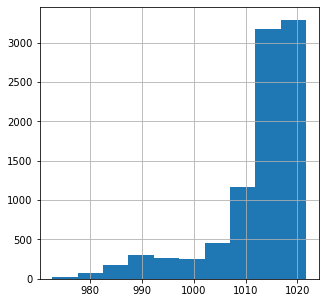

In [24]:
df['Valencia_pressure'].hist(bins=10, figsize=(5,5)) 
plt.show

We can see that the Valencia_pressure is negatively skewed (i.e. skewed to the left). Since the mean is quite sensitive to outliers, the median would be the best way to impute the data.

In [25]:
#Impute Valencia_pressure with the median and not mean because the data of Valencia_pressure is highly negatively skewed
val_pressure = df.Valencia_pressure.median()
df.loc[df.Valencia_pressure.isnull(),'Valencia_pressure'] = val_pressure

In [26]:
df['Valencia_pressure'].isnull().sum()

0

We can see **Valencia_pressure** has been correctly imputed.

<function matplotlib.pyplot.show(close=None, block=None)>

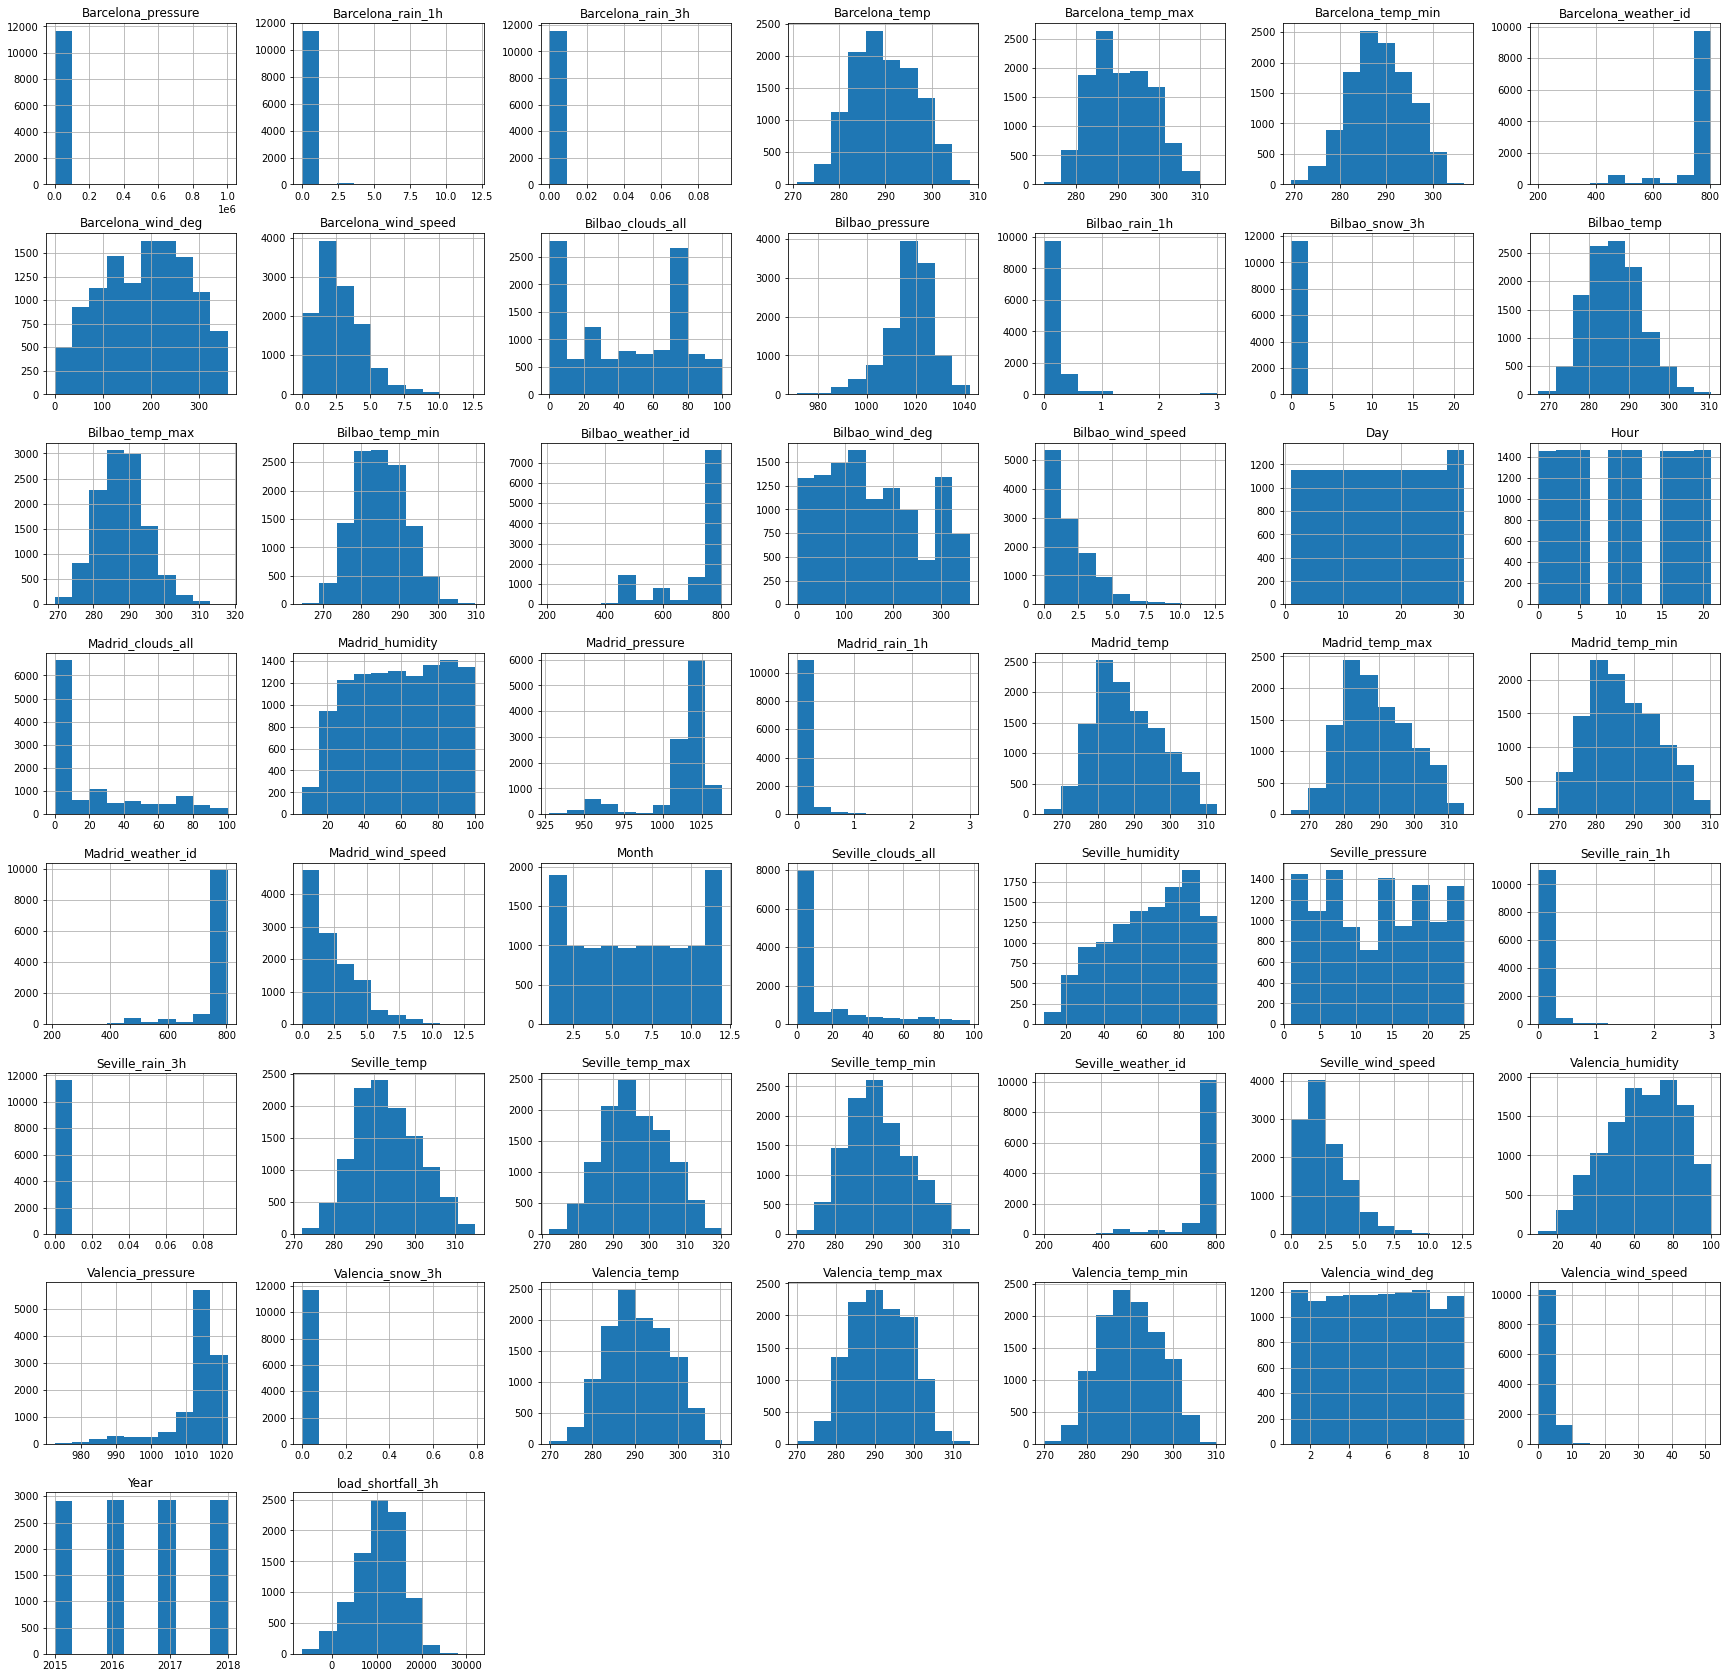

In [27]:
# We can plot histograms of all the data to see their distributions.
df.hist(bins=10, figsize=(30,30)) 
plt.show

We can see that some of the data follow the Standard Normal Distribution pattern. Although there are some features that are highly skewed. This is a visual representation of the **skew_interpretations** and **kurtosis_interpretation** code cells above.

In [28]:
#Reorder the columns
column_titles = [col for col in df.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df = df.reindex(columns=column_titles)

### Graphical multi-variate analysis



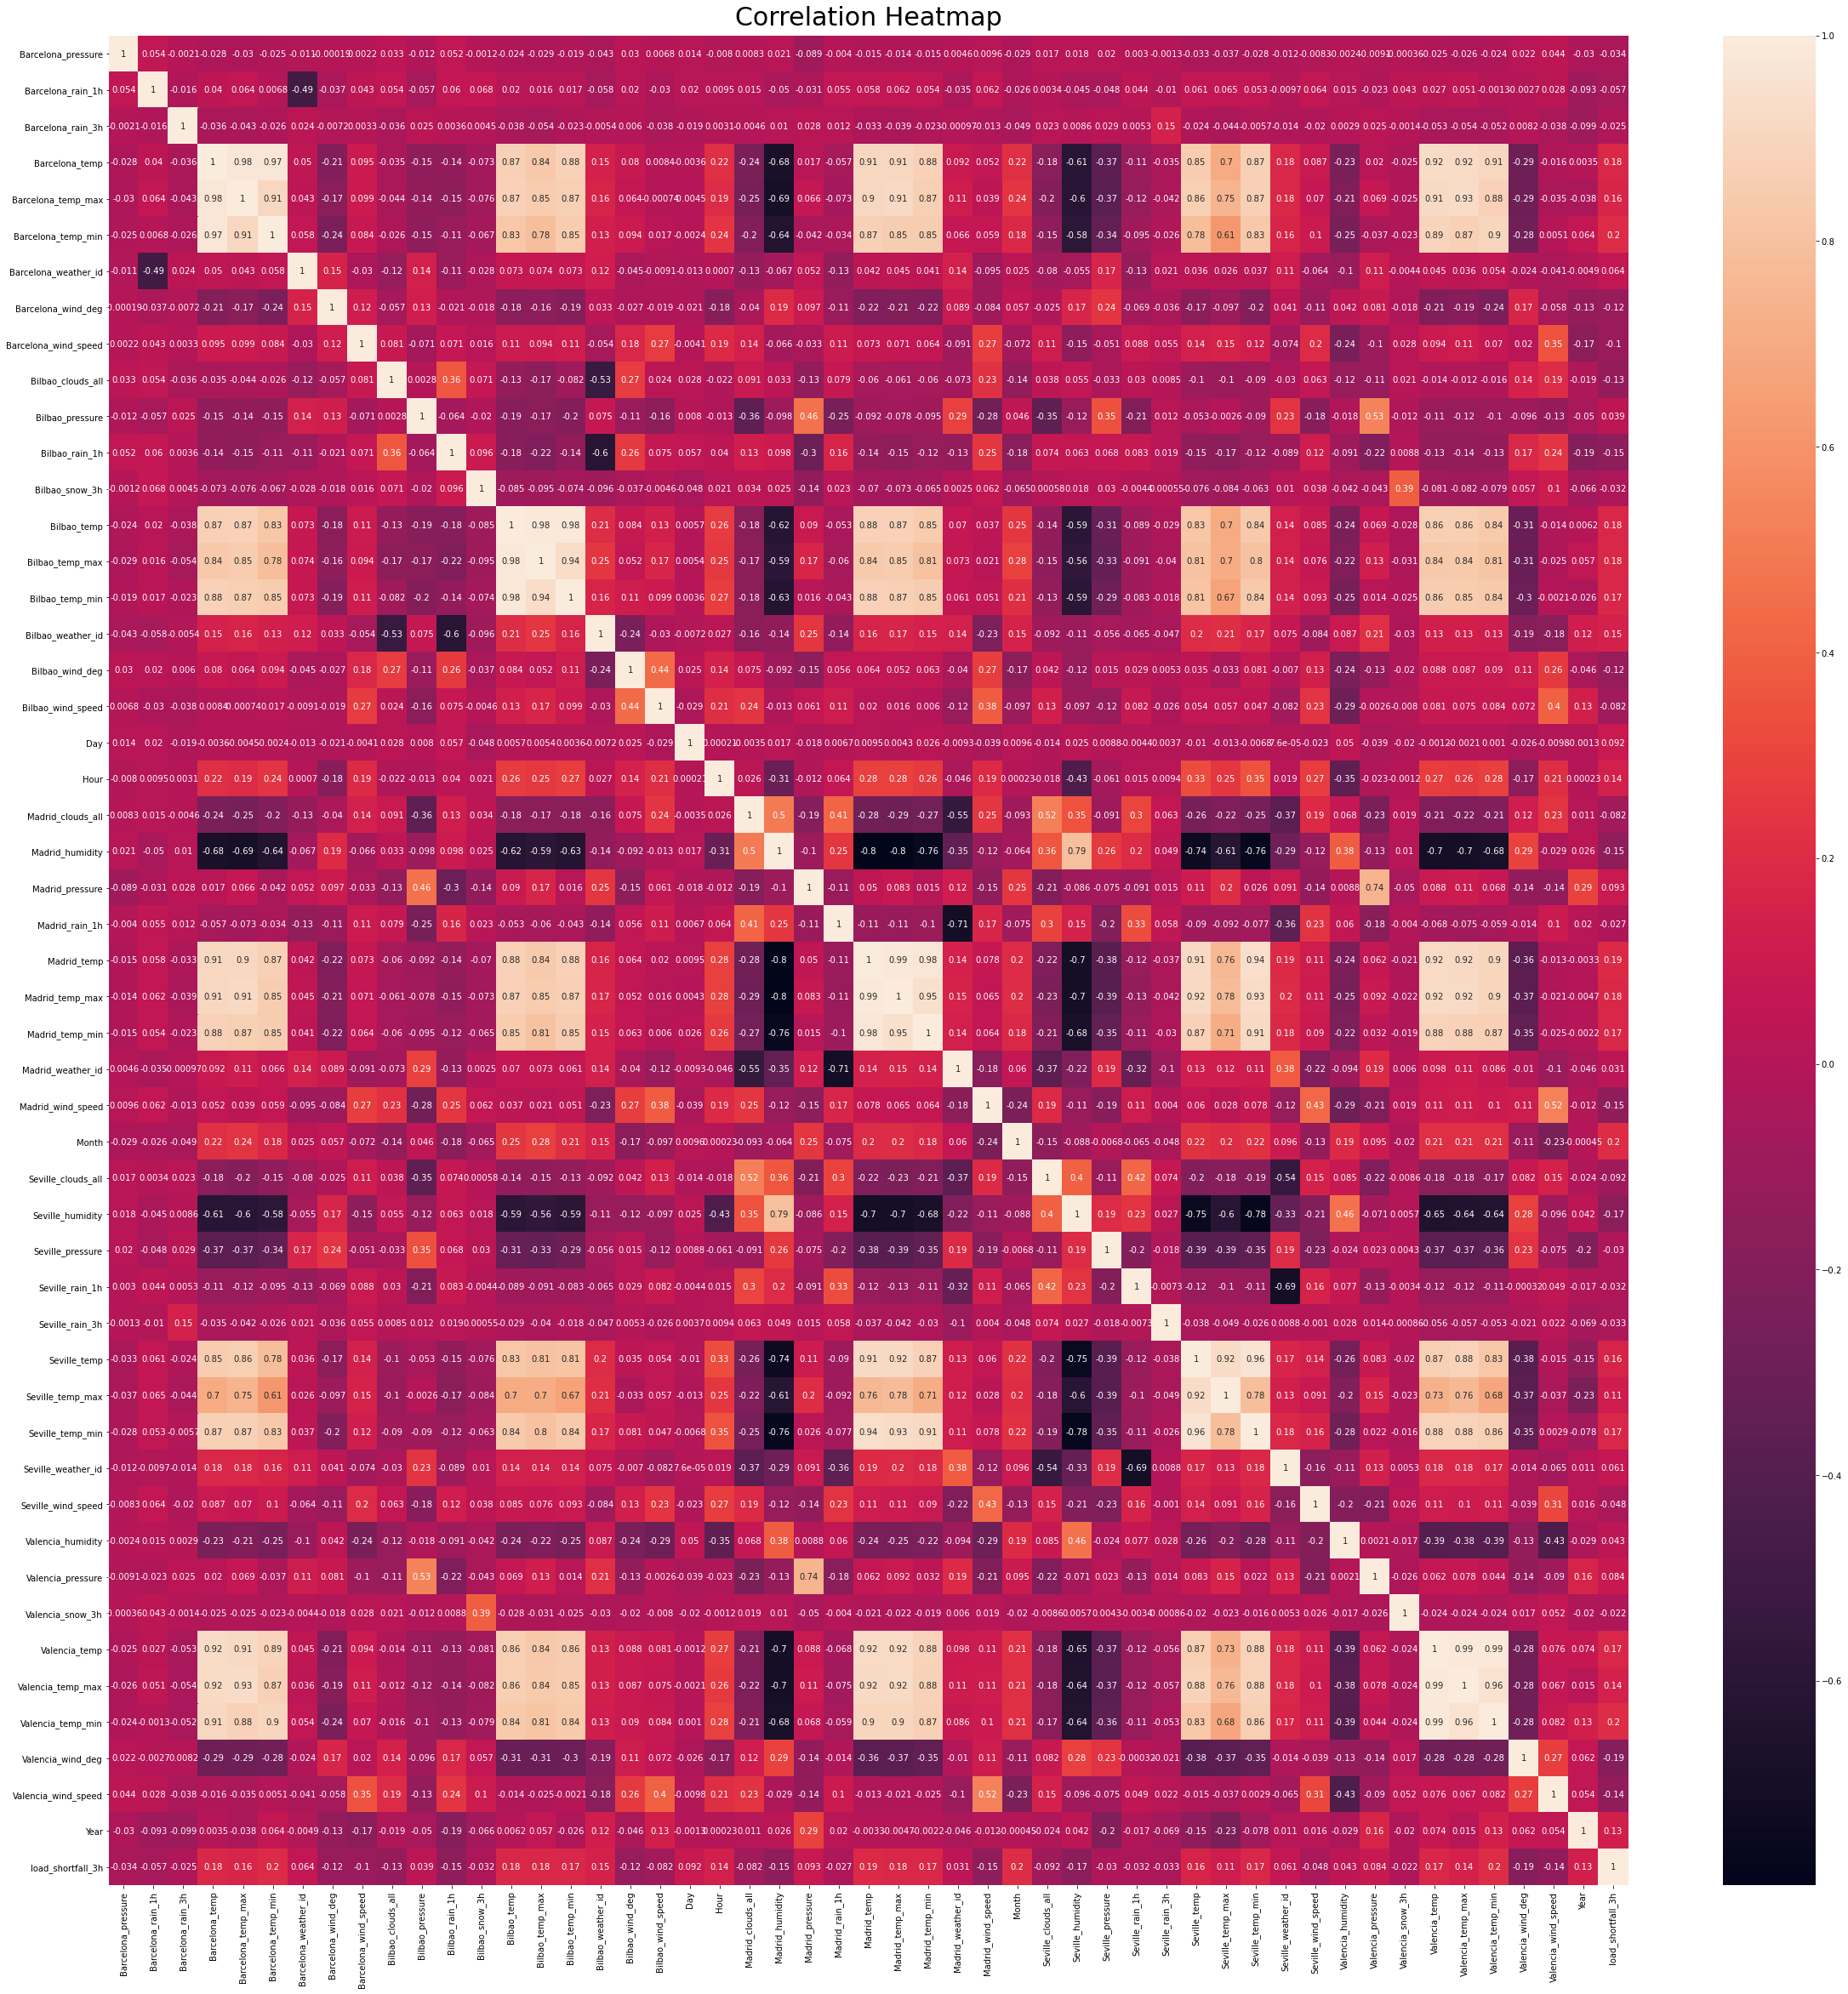

In [29]:
# Plotting of a heatmap - To show if there are any clear correlation between features.
plt.figure(figsize = (40,40))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':30}, pad=12);

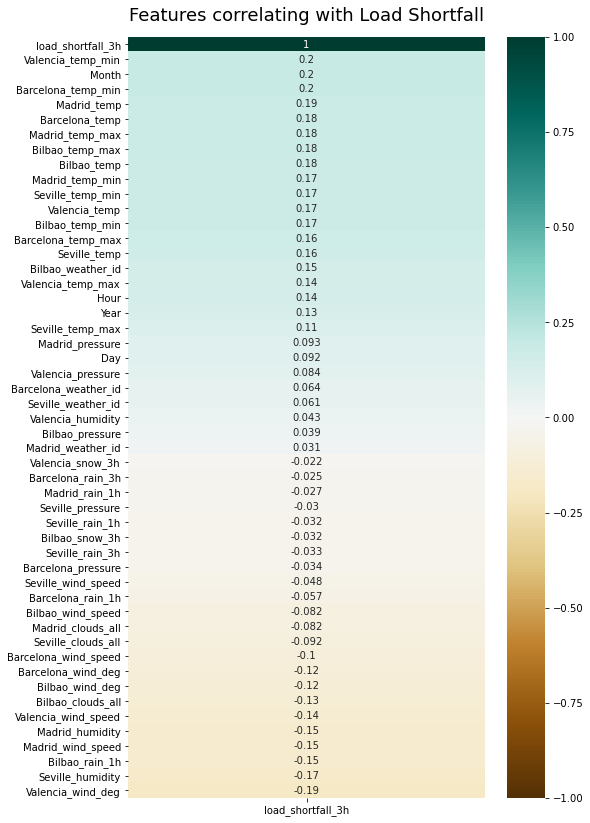

In [30]:
# Plotting of a heatmap of the features against the dependent variable.
plt.figure(figsize=(8,14))
hm = sns.heatmap(df.corr()[['load_shortfall_3h']].sort_values(by='load_shortfall_3h', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm.set_title('Features correlating with Load Shortfall', fontdict={'fontsize':18}, pad=16);

We can see that there are features that not clearly correlated to our dependent variable, and some features that are either positively or negatively correlated to the dependant variable.

In [31]:
# Does the three-hour period have any correlation with the load_shortfall_3h?
hour_lsf = df.groupby('Hour')['load_shortfall_3h'].sum().sort_values(ascending=False)
hour_lsf = pd.DataFrame(data=hour_lsf)
hour_lsf = hour_lsf.rename(columns={'load_shortfall_3h': 'Total_load_shortfall_3h(H)'})
hour_lsf

Total_load_shortfall_3h(H)
Hour                            
0                   1.381774e+07
21                  1.358575e+07
12                  1.351571e+07
15                  1.280276e+07
18                  1.171831e+07
9                   1.148529e+07
3                   9.245281e+06
6                   7.364176e+06

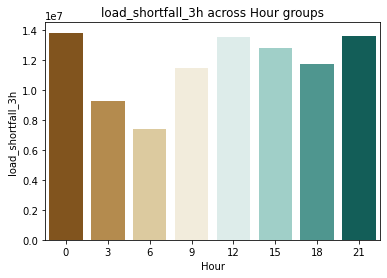

<Figure size 864x576 with 0 Axes>

In [32]:
# Total load_shortfall_3h across Hour groups
ax = sns.barplot(x=hour_lsf.index, y='Total_load_shortfall_3h(H)', data=hour_lsf, palette="BrBG")

ax.set_title('load_shortfall_3h across Hour groups',fontsize=12)
plt.figure(figsize=[12, 8])
ax.set_xlabel('Hour', fontsize=10)
ax.set_ylabel('load_shortfall_3h', fontsize=10)
ax.grid(False)
plt.show()

In [33]:
# Does the month have any correlation with the load_shortfall_3h?
month_lsf = df.groupby('Month')['load_shortfall_3h'].sum().sort_values(ascending=False)
month_lsf = pd.DataFrame(data=month_lsf)
month_lsf = month_lsf.rename(columns={'load_shortfall_3h': 'Total_load_shortfall_3h(M)'})
month_lsf

Total_load_shortfall_3h(M)
Month                            
7                    9.551538e+06
11                   9.274173e+06
10                   8.534077e+06
8                    8.508996e+06
12                   8.299457e+06
9                    8.226586e+06
6                    8.046117e+06
1                    7.760032e+06
5                    6.765836e+06
3                    6.364390e+06
4                    6.194448e+06
2                    6.009364e+06

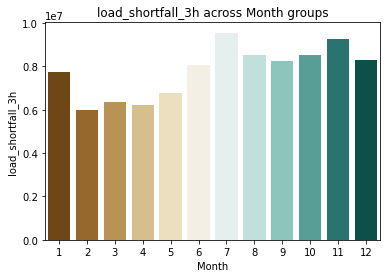

<Figure size 864x576 with 0 Axes>

In [34]:
ax = sns.barplot(x=month_lsf.index, y='Total_load_shortfall_3h(M)', data=month_lsf, palette="BrBG")

ax.set_title('load_shortfall_3h across Month groups',fontsize=12)
plt.figure(figsize=[12, 8])
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('load_shortfall_3h', fontsize=10)
ax.grid(False)
plt.show()

In [35]:
# Does the year period have any correlation with the load_shortfall_3h?
year_lsf = df.groupby('Year')['load_shortfall_3h'].sum().sort_values(ascending=False)
year_lsf = pd.DataFrame(data=year_lsf)
year_lsf = year_lsf.rename(columns={'load_shortfall_3h': 'Total_load_shortfall_3h(Y)'})
year_lsf

Total_load_shortfall_3h(Y)
Year                            
2017                3.523344e+07
2015                3.028032e+07
2016                2.802125e+07
2018                0.000000e+00

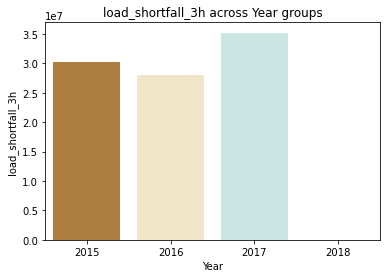

<Figure size 864x576 with 0 Axes>

In [36]:
ax = sns.barplot(x=year_lsf.index, y='Total_load_shortfall_3h(Y)', data=year_lsf, palette="BrBG")

ax.set_title('load_shortfall_3h across Year groups',fontsize=12)
plt.figure(figsize=[12, 8])
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('load_shortfall_3h', fontsize=10)
ax.grid(False)
plt.show()

#### Key Insights

- Not all the features follow the Gaussian Distribution.

- Heavy presence of outliers in the dataset that needs to be accounted for/treated correctly.

- Some Features have little correlation with the dependant variable. Futher details will follow.

- Load shortfall is lower in the AMs, probably due to low electricity usage during that period. Higher in the PMs due to high usage.

- Load shortfall is lower in the first six months of the year...

- Rain and snow data have little correlation to load shortfall.

- The **load_shortfall_3h** across Year groups graph does not provide useful information.


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Create targets and features dataframes then seperate the test from the train data set.

In [37]:
# create targets and features dataset
y = df[:len(df_train)][['load_shortfall_3h']] 
X = df[:len(df_train)].drop('load_shortfall_3h', axis=1)

X = our features or independant variables (IVs). These will be used to predict our depedant variable. 

Y = dependant/target variable is also known as the dependent variable (DV) and is the target variable we want to predict.

In [38]:
X.shape

(8763, 50)

In [39]:
y.shape

(8763, 1)

In [40]:
#seperate the test from the train data set
x_train_copy = df[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test_copy = df[len(df_train):].drop('load_shortfall_3h',axis=1)

In [41]:
x_train_copy.shape

(8763, 50)

In [42]:
x_test_copy.shape

(2920, 50)

In [43]:
# split the train data further into train/test data (to perform validation before bringing in the true unseen test data)
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50, shuffle=False)

### Feature Scaling

In regularisation, the scale of the data is critical. the penalty on particular coefficients in regularisation techniques namely L1 and L2, depends largely on the scale associated with the variables. In other words, the size of the variables affects how much regularisation will be applied to that specific variable. Therefore, we need to get all the features on the same scale to avoid disproportionate penalization. 

There are two common scaling techniques: 

##### Normalisation

Squeeze data into the range $[0,1]$. Through normalisation, the maximum value of a variable becomes one, the minimum becomes zero, and the values in-between become decimals between zero and one. Normalisation is useful because it ensures all variables share the same range: $[0,1]$. The issue with normalisation is that it is not robust to outliers. That is to say, if there are outliers, the bulk of the data will all lie in a small range, so you would lose information.

##### Standardisation

Z-score standardisation is robust to outliers. We implement Z-score standardisation by applying the following operation to each of our variables: 

$$\hat{x}_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}.$$

- $\mu_j$ represents the mean of variable $x_j$, 
- while $\sigma_j$ is the variable's standard deviation. 

This does not completely remove the effects of outliers, it does consider them in a more conservative manner. The variables end up with a mean of zero and standard deviation of approximately one.

We chose to scale our features data (not the target variable) using the Standardization method as our data has a high presence of outliers and skewed distributions.

In [45]:
# importing of the scaling method to be used
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [46]:
# Scaling of data
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
df_test = scale.transform(x_test_copy)

In [47]:
X_std = pd.DataFrame(X_train, columns=X.columns)
X_std.head()

Barcelona_pressure  Barcelona_rain_1h  Barcelona_rain_3h  Barcelona_temp  \
0           -0.027433           -0.21897          -0.123215       -1.334472   
1           -0.027369           -0.21897          -0.123215       -1.407925   
2           -0.027327           -0.21897          -0.123215       -1.241599   
3           -0.027391           -0.21897          -0.123215       -0.940448   
4           -0.027518           -0.21897          -0.123215       -0.813658   

   Barcelona_temp_max  Barcelona_temp_min  Barcelona_weather_id  \
0           -1.342300           -1.218673              0.408247   
1           -1.405297           -1.301362              0.408247   
2           -1.262645           -1.114122              0.408247   
3           -1.004360           -0.775104              0.408247   
4           -0.895617           -0.632372              0.408247   

   Barcelona_wind_deg  Barcelona_wind_speed  Bilbao_clouds_all  \
0           -1.697470              1.814927          -1.310873   
1           -0.630137              0.535213          -1.310873   
2            1.441744             -0.561684          -1.310873   
3            0.854527             -0.378868          -1.310873   
4            0.710492              0.718030          -1.249939   

   Bilbao_pressure  Bilbao_rain_1h  Bilbao_snow_3h  Bilbao_temp  \
0         1.682747        -0.37371       -0.064057    -2.455704   
1         1.745411        -0.37371       -0.064057    -2.302180   
2         1.776743        -0.37371       -0.064057    -1.613840   
3         1.776743        -0.37371       -0.064057    -0.709937   
4         1.714079        -0.37371       -0.064057    -0.544631   

   Bilbao_temp_max  Bilbao_temp_min  Bilbao_weather_id  Bilbao_wind_deg  \
0        -2.521804        -2.323032           0.661675         0.608267   
1        -2.377028        -2.164707           0.661675         0.585416   
2        -1.727907        -1.454838           0.661675         0.520127   
3        -0.875503        -0.522664           0.661675         0.376492   
4        -0.719616        -0.352188           0.661675         0.232856   

   Bilbao_wind_speed       Day      Hour  Madrid_clouds_all  Madrid_humidity  \
0          -0.500277 -1.672931 -1.090740          -0.748119         0.174466   
1          -0.500277 -1.672931 -0.654245          -0.748119         0.202211   
2          -0.500277 -1.672931 -0.217749          -0.748119         0.188338   
3          -0.500277 -1.672931  0.218746          -0.748119        -0.144605   
4          -0.886567 -1.672931  0.655241          -0.748119        -0.116860   

   Madrid_pressure  Madrid_rain_1h  Madrid_temp  Madrid_temp_max  \
0        -1.520836       -0.262912    -2.379288        -2.367634   
1        -1.465549       -0.262912    -2.329838        -2.320844   
2        -1.410262       -0.262912    -1.633054        -1.661549   
3        -0.553313       -0.262912    -0.620552        -0.703520   
4         1.132940       -0.262912    -0.754661        -0.830413   

   Madrid_temp_min  Madrid_weather_id  Madrid_wind_speed     Month  \
0        -2.276513           0.364032          -0.965145 -1.421879   
1        -2.226435           0.364032          -1.140877 -1.421879   
2        -1.520798           0.364032          -0.789413 -1.421879   
3        -0.495430           0.364032          -0.789413 -1.421879   
4        -0.631243           0.364032          -0.789413 -1.421879   

   Seville_clouds_all  Seville_humidity  Seville_pressure  Seville_rain_1h  \
0           -0.614157          0.428611          1.494089        -0.243078   
1           -0.614157          0.608788          1.494089        -0.243078   
2           -0.614157          0.293478          1.494089        -0.243078   
3           -0.614157          0.023213          1.494089        -0.243078   
4           -0.614157         -0.262067          1.494089        -0.243078   

   Seville_rain_3h  Seville_temp  Seville_temp_max  Seville_temp_min  \
0        -0.074144    

Looking at our newly scaled dataframe, we can see that our features data have zero means and standard deviations of around one.

In [48]:
# Inspect the new dataframe
X_std.describe().loc['std']

Barcelona_pressure      1.000071
Barcelona_rain_1h       1.000071
Barcelona_rain_3h       1.000071
Barcelona_temp          1.000071
Barcelona_temp_max      1.000071
Barcelona_temp_min      1.000071
Barcelona_weather_id    1.000071
Barcelona_wind_deg      1.000071
Barcelona_wind_speed    1.000071
Bilbao_clouds_all       1.000071
Bilbao_pressure         1.000071
Bilbao_rain_1h          1.000071
Bilbao_snow_3h          1.000071
Bilbao_temp             1.000071
Bilbao_temp_max         1.000071
Bilbao_temp_min         1.000071
Bilbao_weather_id       1.000071
Bilbao_wind_deg         1.000071
Bilbao_wind_speed       1.000071
Day                     1.000071
Hour                    1.000071
Madrid_clouds_all       1.000071
Madrid_humidity         1.000071
Madrid_pressure         1.000071
Madrid_rain_1h          1.000071
Madrid_temp             1.000071
Madrid_temp_max         1.000071
Madrid_temp_min         1.000071
Madrid_weather_id       1.000071
Madrid_wind_speed       1.000071
Month     

In [49]:
X_std_copy = X_std.copy()
X_std_copy.shape

(7010, 50)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This section takes us through the machine learning process. We train and test a number of regression model algorithms and later select the model with the best performance to be used in this project. From the five modeling techniques, we compare the RMSE values of each model as well as the time taken to train and test each model. This will inform our model selection decision.

#### Model 1 - Ridge Regression

In [50]:
%%time

ridge = Ridge()
ridge.fit(X_train, y_train)

Wall time: 56.6 ms


Ridge()

#### Model 2 - Decision Tree Regressor

In [51]:
%%time

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

Wall time: 267 ms


DecisionTreeRegressor()

#### Model 3 - Linear Regression

In [52]:
%%time

lm = LinearRegression()
lm.fit(X_train, y_train)

Wall time: 49.5 ms


LinearRegression()

#### Model 4 - KNeighbors Regressor

In [53]:
%%time

knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

Wall time: 2.99 ms


KNeighborsRegressor()

#### Model 5 - XGBRegressor

In [54]:
%%time

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

Wall time: 946 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The performance/evaluation metric we're going to consider is the Root Mean Squared Error (RMSE). RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. In other words, RMSE measures how spread out these residuals are, and it tells you how concentrated the data is around the line of best fit. RMSE is commonly used in regression analysis and forecasting. It is calculated by determining the square root of the Mean Squared Error equation below.

**Mean Squared Error:**
 
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$ 

The following code cells compute the test set predictions for each model and their respective Root Mean Squared Errors. 

In [75]:
%%timeit
ridge_predict = ridge.predict(X_test)
ridge_RMSE = sqrt(metrics.mean_squared_error(y_test, ridge_predict))
ridge_RMSE

1.48 ms ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
%%time
dtr_predict = dtr.predict(X_test)
dtr_RMSE = sqrt(metrics.mean_squared_error(y_test, dtr_predict))

Wall time: 2.99 ms


In [77]:
%%time
lm_predict = lm.predict(X_test)
lm_RMSE = metrics.mean_squared_error(y_test, lm_predict, squared=False)

Wall time: 5.98 ms


In [72]:
%%time
knn_predict = knn.predict(X_test)
knn_RMSE = metrics.mean_squared_error(y_test, knn_predict, squared=False)

Wall time: 257 ms


In [78]:
%%time
xgb_predict = xgb.predict(X_test)

XGB_RMSE = metrics.mean_squared_error(y_test, xgb_predict, squared=False)

Wall time: 5.98 ms


In [117]:
# We compare all the model's performance. Create a dataframe of all the models' test RMSE values 
RMSE_dict = {'Test_RMSE':
             {
                 "Ridge Regression": ridge_RMSE,
                "Decision Tree": dtr_RMSE,
              "Linear Regression": lm_RMSE,
              "KNeighborsRegressor": knn_RMSE,
                 "XGB Regressor": XGB_RMSE 
              }
             }
RMSE_df_test = pd.DataFrame(data=RMSE_dict)
RMSE_df_test

Test_RMSE
Decision Tree        4548.841020
KNeighborsRegressor  4765.006149
Linear Regression    4848.869044
Ridge Regression     4841.212111
XGB Regressor        4361.639173

From the table above, we can see that the XGB regressor perfroms the best with the lowest RMSE value while the Decision Tree Regressor performs the worst. 

How do the models' RMSE values fair during training?

In [82]:
ridge_predict_train = ridge.predict(X_train)
ridge_RMSE_train = metrics.mean_squared_error(y_train, ridge_predict_train, squared=False)

In [83]:
dtr_predict_train = dtr.predict(X_train)
dtr_RMSE_train = metrics.mean_squared_error(y_train, dtr_predict_train, squared=False)

In [84]:
lm_predict_train = lm.predict(X_train)
lm_RMSE_train = metrics.mean_squared_error(y_train, lm_predict_train, squared=False)

In [85]:
knn_predict_train = knn.predict(X_train)
knn_RMSE_train = metrics.mean_squared_error(y_train, knn_predict_train, squared=False)

In [86]:
xgb_predict_train = xgb.predict(X_train)
xgb_RMSE_train = metrics.mean_squared_error(y_train, xgb_predict_train, squared=False)

In [128]:
# Create a dataframe of all the models' train RMSE values 
RMSE_dict_train = {'Train_RMSE':
             {
                 "Ridge Regression": ridge_RMSE_train,
                "Decision Tree": dtr_RMSE_train,
              "Linear Regression": lm_RMSE_train,
              "KNeighborsRegressor": knn_RMSE_train,
                "XGB Regressor": xgb_RMSE_train 
              }
             }
RMSE_df_train = pd.DataFrame(data=RMSE_dict_train)

In [129]:
RMSE_df_train['Test_RMSE'] = RMSE_df_test['Test_RMSE']
RMSE_df_train

Train_RMSE    Test_RMSE
Decision Tree           0.000000  4548.841020
KNeighborsRegressor  3207.249082  4765.006149
Linear Regression    4750.426130  4848.869044
Ridge Regression     4750.678087  4841.212111
XGB Regressor        1157.539775  4361.639173

Plot the test and training RMSE values

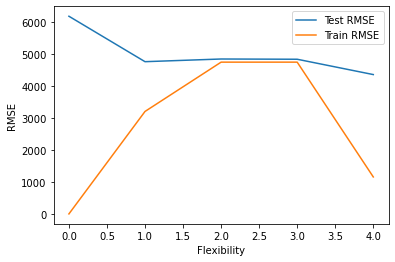

In [88]:
plt.plot( np.arange(len(RMSE_df_test['Test_RMSE'])) , RMSE_df_test['Test_RMSE'], label='Test RMSE')
plt.plot( np.arange(len(RMSE_df_train['Train_RMSE'])) , RMSE_df_train['Train_RMSE'], label='Train RMSE')
plt.xlabel('Flexibility')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Feature Selection

Variable selection involves the elimination of select independant variables that add noise to the data, which may in turn reduce the computational cost of modeling and, in some cases, improve the performance of the model. 

In [98]:
# Chose the top features that best predict load shortfall 3h

selector = SelectKBest(k=38)
fit = selector.fit(X,y)
X_best = selector.fit_transform(X,y)

# Created dataframes showing top columns and their scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

# naming the dataframe columns
featureScores.columns = ['Feature','Score']  

# print 5 best features
Top_features= featureScores.nlargest(38,'Score')  

C:\Users\rebec\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rebec\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\rebec\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rebec\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [99]:
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.2, random_state=50)

In [100]:
X_train_best = scale.fit_transform(X_train_best)
X_test_best = scale.transform(X_test_best)

In [106]:
# How do the models perform after feature selection?
# Ridge
ridge.fit(X_train_best, y_train_best)
ridge_predict_best = ridge.predict(X_test_best)
ridge_RMSE_best = sqrt(metrics.mean_squared_error(y_test_best, ridge_predict_best))
ridge_RMSE_best

4796.309371449811

In [109]:
# Linear Regression
lm.fit(X_train_best,y_train_best)
lm_predict_best = lm.predict(X_test_best)
lm_RMSE_best = sqrt(metrics.mean_squared_error(y_test_best, lm_predict_best))
lm_RMSE_best

4795.665372035984

In [107]:
# Decision Tree
dtr.fit(X_train_best, y_train_best)
dtr_predict_best = dtr.predict(X_test_best)
dtr_RMSE = sqrt(metrics.mean_squared_error(y_test_best, dtr_predict_best))
dtr_RMSE

4548.841019937197

In [110]:
# K Neighbours Regressor
knn.fit(X_train_best,y_train_best)
knn_predict_best = knn.predict(X_test_best)
knn_RMSE_best = sqrt(metrics.mean_squared_error(y_test_best, knn_predict_best))
knn_RMSE_best

4196.166226586593

In [111]:
# XGB Booster
xgb.fit(X_train_best, y_train_best)
xgb_predict_best = dtr.predict(X_test_best)
xgb_RMSE = sqrt(metrics.mean_squared_error(y_test_best, dtr_predict_best))
xgb_RMSE

4548.841019937197

In [ ]:
RMSE_dict = {'RMSE_best':
             {
                 "Ridge Regression": ridge_RMSE_best,
              "Linear Regression": lm_RMSE,
              "KNeighborsRegressor": knn_RMSE,
              "Decision Tree": dtr_RMSE,
                 "XGB Regressor": XGB_RMSE 
              }
             }
RMSE_df_test = pd.DataFrame(data=RMSE_dict)
RMSE_df_test.T

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

In [ ]:
# Submission file

In [ ]:
x_train_final = df[:len(df_train)].drop('load_shortfall_3h', axis=1)
x_test_final = df[len(df_train):].drop('load_shortfall_3h',axis=1)

In [ ]:
x_train_final.head()

In [ ]:
x_test_final.head()

In [ ]:
x_train_final.shape

In [ ]:
x_test_final.shape

In [ ]:
#x_train_final = pd.DataFrame(x_train_final, columns = X.columns)

In [ ]:

fit_final = selector.fit(x_train_final, y)
x_best_final = selector.fit_transform(x_train_final,y)
x_best_test = selector.transform(x_test_final)

# Created dataframes showing top columns and their scores
dfscores_final = pd.DataFrame(fit_final.scores_)
dfcolumns_final = pd.DataFrame(x_train_final.columns) 
featureScores_final = pd.concat([dfcolumns_final,dfscores_final], axis=1)

# naming the dataframe columns
featureScores_final.columns = ['Feature','Score']  

# print 5 best features
Top_features_final = featureScores_final.nlargest(38,'Score')  
Top_features_final


In [ ]:
X_train_final = scale.fit_transform(x_best_final)
X_test_final = scale.transform(x_best_test)

In [ ]:
X_train_final.shape

In [ ]:
X_test_final.shape

In [ ]:
xgb.fit(X_train_final, y)

In [ ]:
preds = xgb.predict(X_test_final)

In [ ]:
daf = pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.head()

In [ ]:
df_test_final = pd.read_csv('df_test.csv')

In [ ]:
output = pd.DataFrame({"time":df_test_final['time']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

In [ ]:
submission